In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test, axis=-1)
x_train,x_test=x_train/255.0, x_test/255.0
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model=Sequential([Conv2D(32,
           kernel_size=(3,3),
           activation='relu',
           input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6879 - loss: 1.0491 - val_accuracy: 0.9277 - val_loss: 0.2542
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.8935 - loss: 0.3567 - val_accuracy: 0.9453 - val_loss: 0.1943
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9134 - loss: 0.2905 - val_accuracy: 0.9533 - val_loss: 0.1659
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9250 - loss: 0.2562 - val_accuracy: 0.9551 - val_loss: 0.1534
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9330 - loss: 0.2302 - val_accuracy: 0.9624 - val_loss: 0.1340
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9373 - loss: 0.2108 - val_accuracy: 0.9647 - val_loss: 0.1262
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9406 - loss: 0.2007 - val_accuracy: 0.9663 - val_loss: 0.1187
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9419 -

In [ ]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'Test loss: {test_loss:.4f}, Test accuracy:{test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9636 - loss: 0.1123
Test loss: 0.0972, Test accuracy:0.9689


In [ ]:
predictions=model.predict(x_test)
predicted_classes=np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


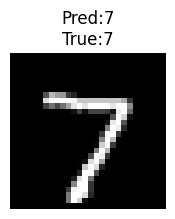

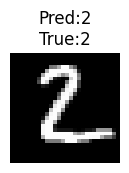

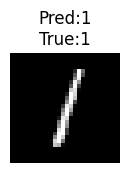

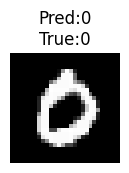

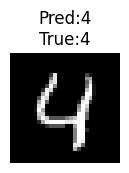

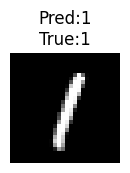

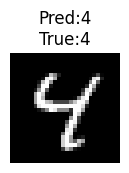

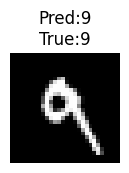

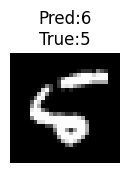

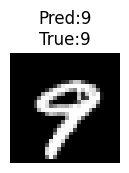

In [ ]:
num_images_to_display=10
plt.figure(figsize=(12,4))
for i in range(num_images_to_display):
  plt.subplot(2,num_images_to_display//2,i+1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f'Pred:{predicted_classes[i]}\nTrue:{np.argmax(y_test[i])}')
  plt.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

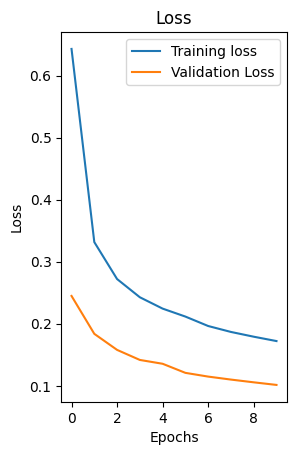

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

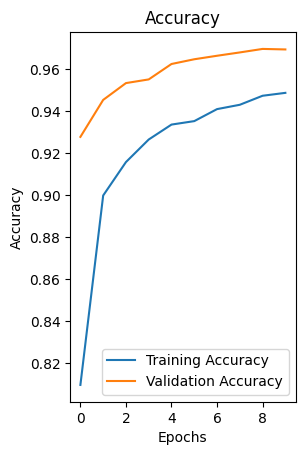

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()